In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/archive (9)/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/archive (9)/test.csv")

In [ ]:
features = pd.read_csv("/content/drive/MyDrive/archive (9)/features.csv")
stores = pd.read_csv("/content/drive/MyDrive/archive (9)/stores.csv")

In [ ]:
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
test_data.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
train_data.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
df = train_data.merge(features, on=['Store', 'Date'], how='inner').merge(stores, on=['Store'], how='inner')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [ ]:
df = df.drop(["IsHoliday_x"], axis = 1)

In [ ]:
df= df.rename(columns={"IsHoliday_y": "IsHoliday"})

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [ ]:
store_class = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)

In [ ]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
188,1,47,2010-02-19,-863.00,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
406,1,47,2010-03-12,-698.00,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
2549,1,47,2010-10-08,-58.00,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,False,A,151315
3632,1,54,2011-01-21,-50.00,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,False,A,151315
4132,1,47,2011-03-11,0.00,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,False,B,118221
420403,45,49,2012-06-29,-34.00,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,False,B,118221
420736,45,49,2012-08-03,-1.91,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,False,B,118221
421007,45,54,2012-08-31,0.00,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,False,B,118221


In [ ]:
df = df.loc[df['Weekly_Sales'] > 0]


In [ ]:
df['Date']=pd.to_datetime(df['Date'])
test_data['Date']=pd.to_datetime(test_data['Date'])

In [ ]:
start_date = df['Date'].min()
start_date

Timestamp('2010-02-05 00:00:00')

In [ ]:
end_date = df['Date'].max()
end_date

Timestamp('2012-10-26 00:00:00')

In [ ]:
df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,42.31,2.572,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,42.31,2.572,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,42.31,2.572,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,42.31,2.572,211.096358,8.106,False,A,151315


In [ ]:
sales=df.groupby('Date')['Weekly_Sales'].sum()

sales.head()

Date
2010-02-05    49750875.98
2010-02-12    48336800.10
2010-02-19    48277902.33
2010-02-26    43970440.65
2010-03-05    46872715.16
Name: Weekly_Sales, dtype: float64

(array([14610., 14730., 14853., 14975., 15095., 15218., 15340., 15461.,
        15584.]),
 [Text(14610.0, 0, '2010-01'),
  Text(14730.0, 0, '2010-05'),
  Text(14853.0, 0, '2010-09'),
  Text(14975.0, 0, '2011-01'),
  Text(15095.0, 0, '2011-05'),
  Text(15218.0, 0, '2011-09'),
  Text(15340.0, 0, '2012-01'),
  Text(15461.0, 0, '2012-05'),
  Text(15584.0, 0, '2012-09')])

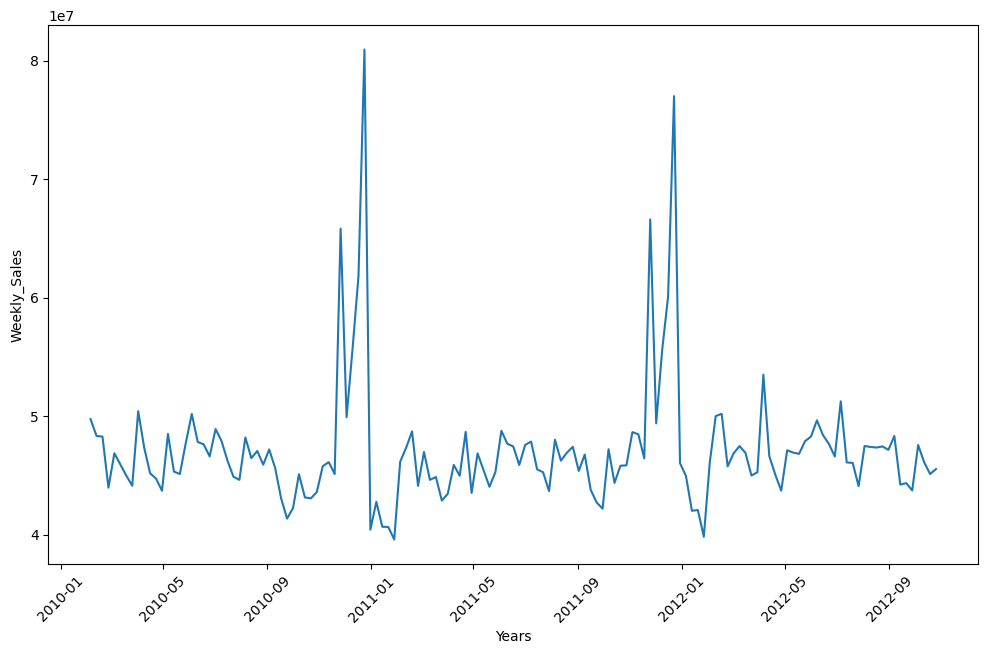

In [ ]:

plt.figure(figsize=(12, 7))
plt.plot(sales)
plt.xlabel('Years')
plt.ylabel('Weekly_Sales')

# Rotate labels for better visibility
plt.xticks(rotation=45)

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

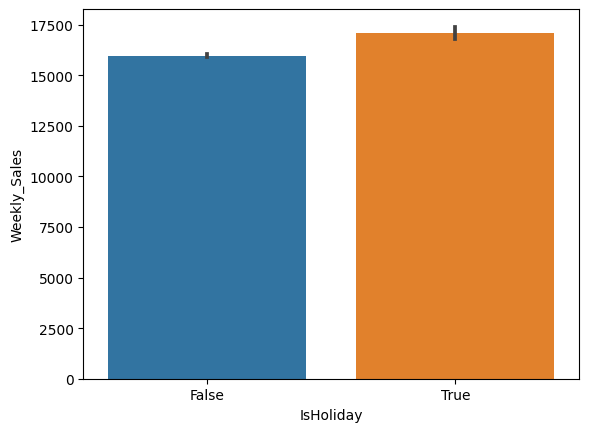

In [ ]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)

In [ ]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [ ]:
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [ ]:
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [ ]:
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [ ]:
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,False,A,151315,False,False
1,1,2,2010-02-05,50605.27,42.31,2.572,211.096358,8.106,False,A,151315,False,False
2,1,3,2010-02-05,13740.12,42.31,2.572,211.096358,8.106,False,A,151315,False,False
3,1,4,2010-02-05,39954.04,42.31,2.572,211.096358,8.106,False,A,151315,False,False
4,1,5,2010-02-05,32229.38,42.31,2.572,211.096358,8.106,False,A,151315,False,False


<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

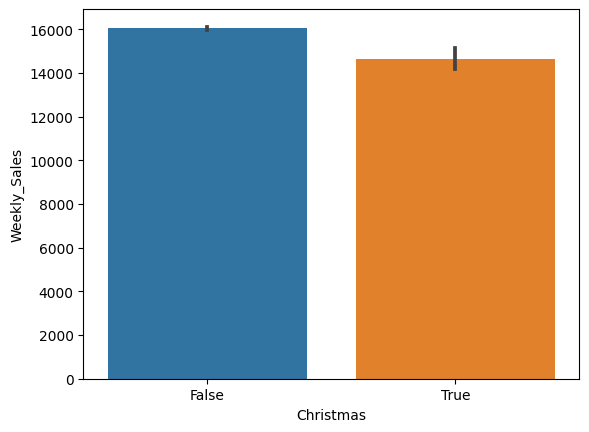

In [ ]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df)


<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

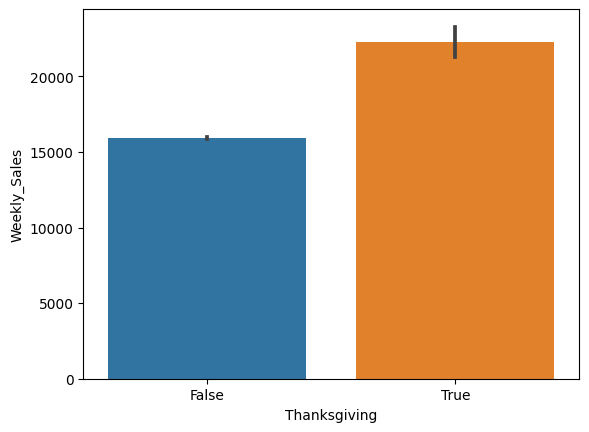

In [ ]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df)


<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

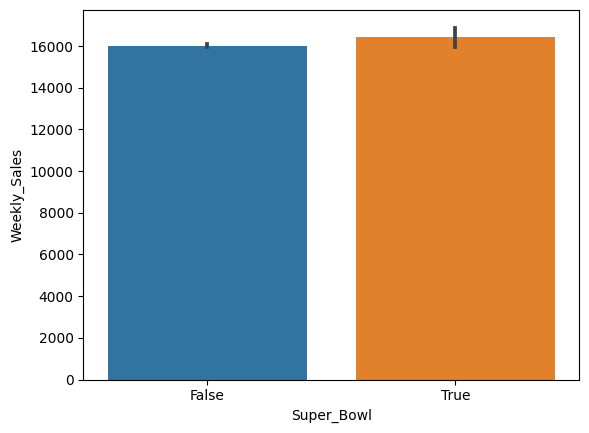

In [ ]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df)

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

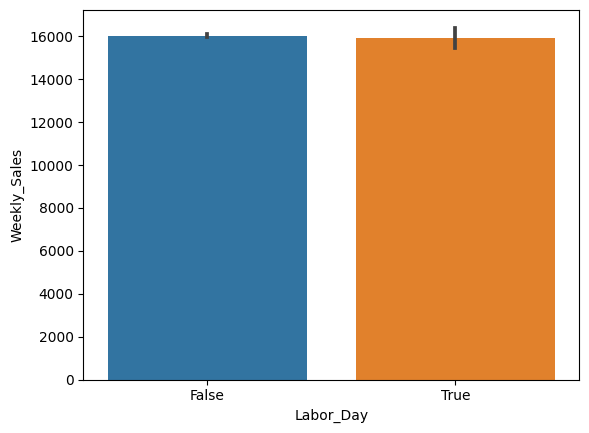

In [ ]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df)

In [ ]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()


IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

In [ ]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Thanksgiving,Christmas
90645,10,72,2010-11-26,693099.36,55.33,3.162,126.669267,9.003,True,B,126512,True,False
337053,35,72,2011-11-25,649770.18,47.88,3.492,140.421786,8.745,True,B,103681,True,False
94393,10,72,2011-11-25,630999.19,60.68,3.760,129.836400,7.874,True,B,126512,True,False
333594,35,72,2010-11-26,627962.93,46.67,3.039,136.689571,8.763,True,B,103681,True,False
131088,14,72,2010-11-26,474330.10,46.15,3.039,182.783277,8.724,True,A,200898,True,False


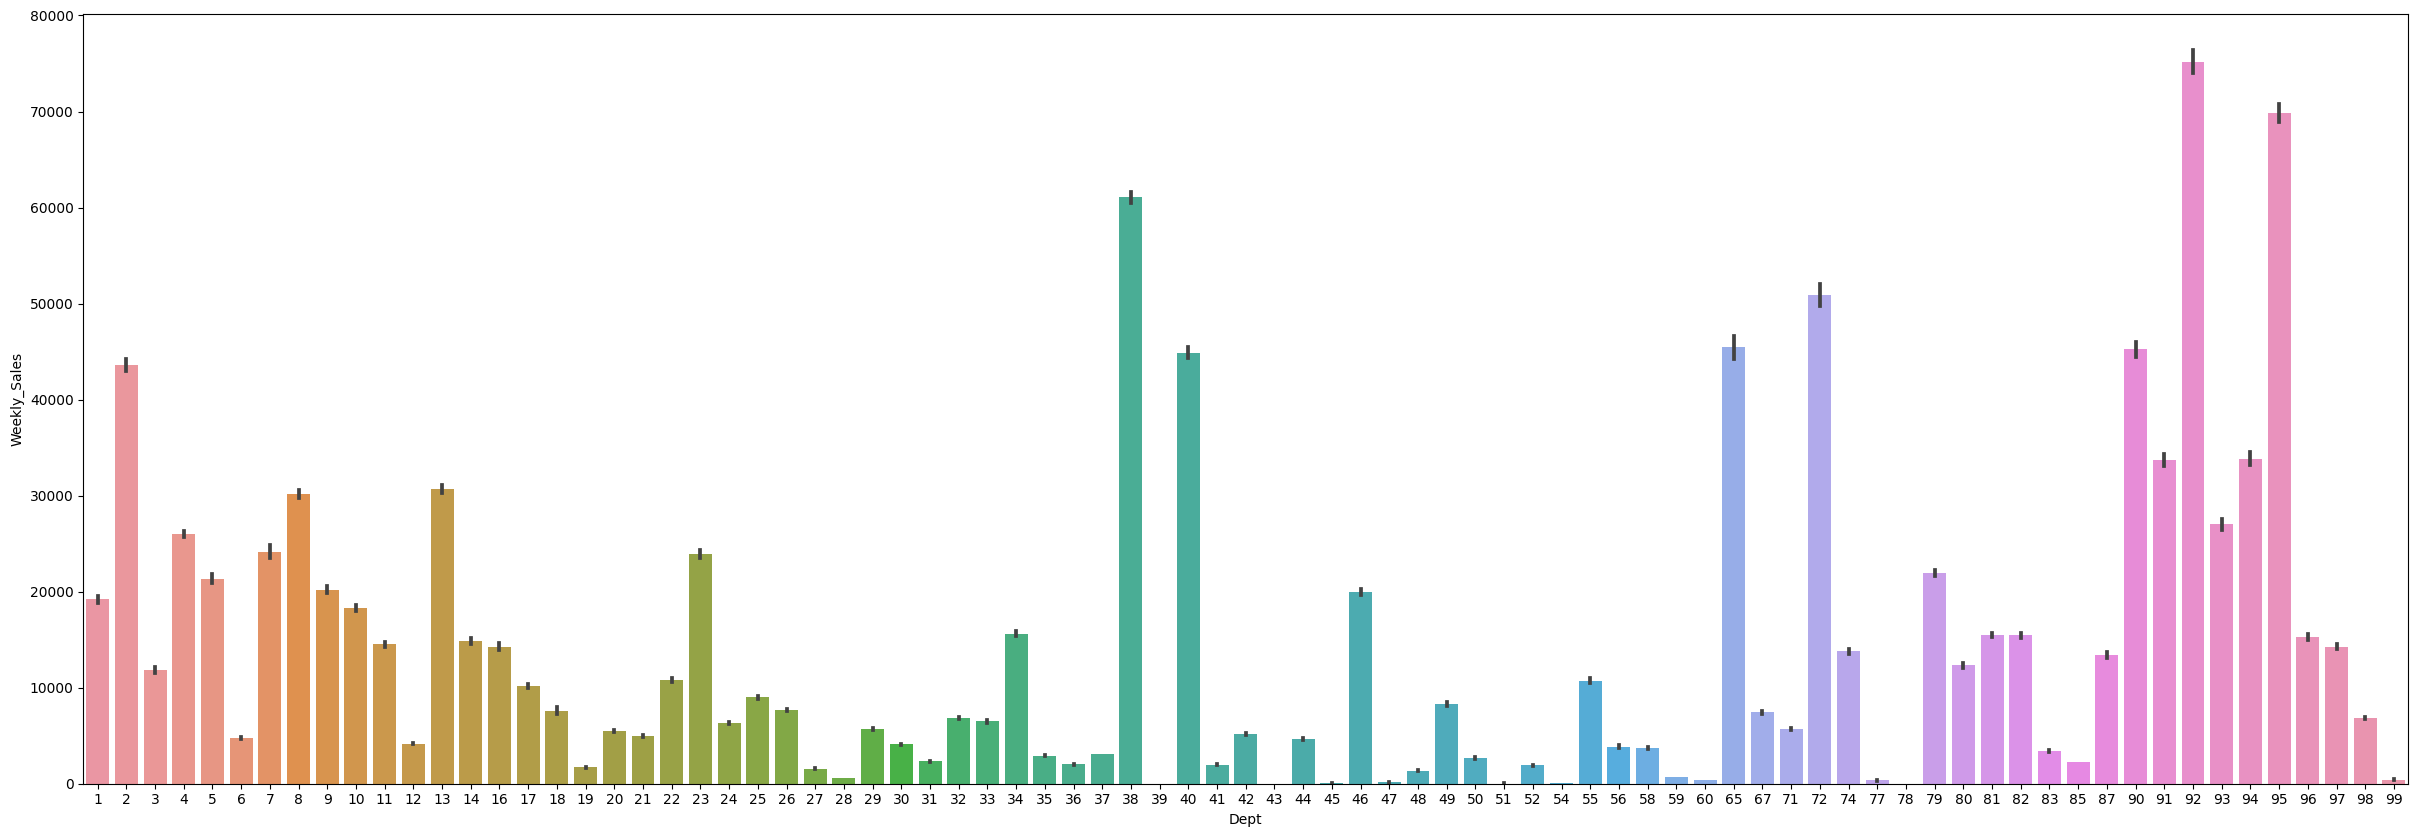

In [ ]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)

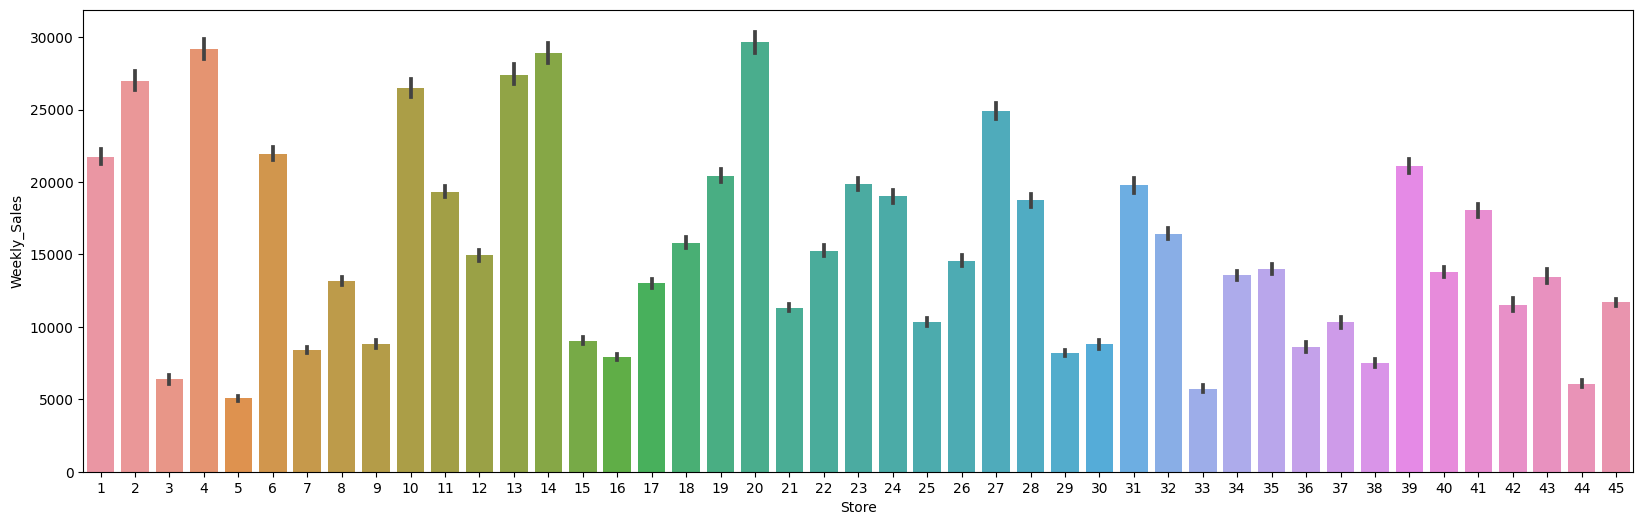

In [ ]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

In [ ]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
df['week'] =df['Date'].dt.isocalendar().week
df['month'] =df['Date'].dt.month
df['year'] =df['Date'].dt.year

In [ ]:
df.groupby('month')['Weekly_Sales'].mean()

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby('year')['Weekly_Sales'].mean()

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='month'>

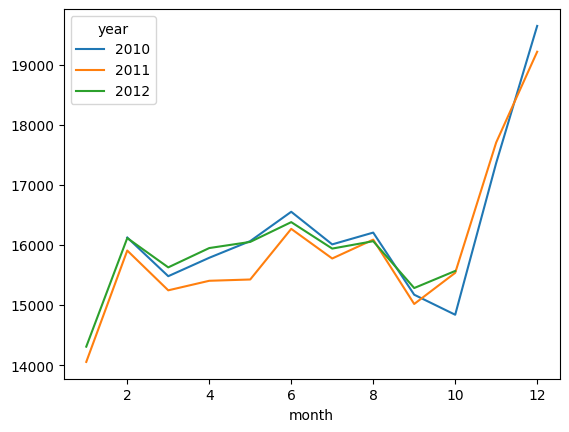

In [ ]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

In [ ]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='week'>

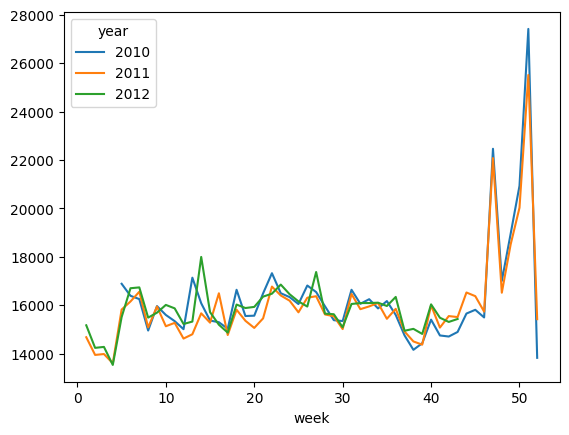

In [ ]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

<Axes: xlabel='Fuel_Price'>

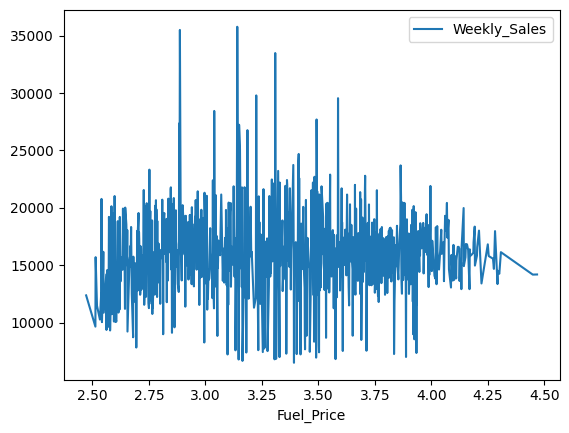

In [ ]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='Temperature'>

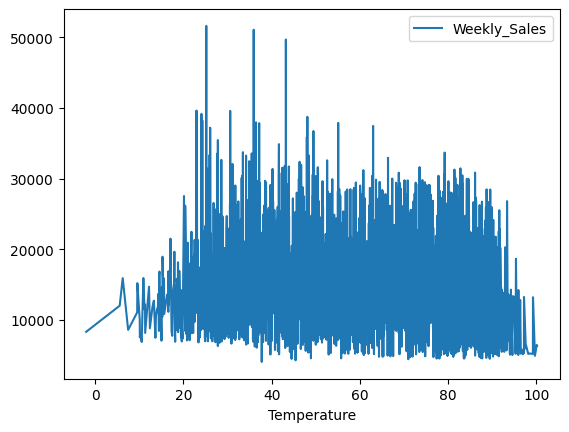

In [ ]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<Axes: xlabel='CPI'>

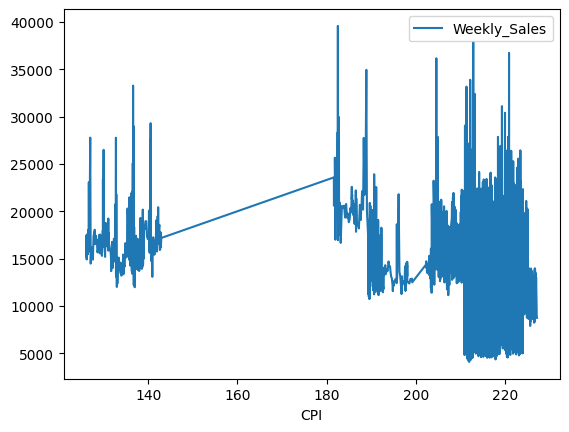

In [ ]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<Axes: xlabel='Unemployment'>

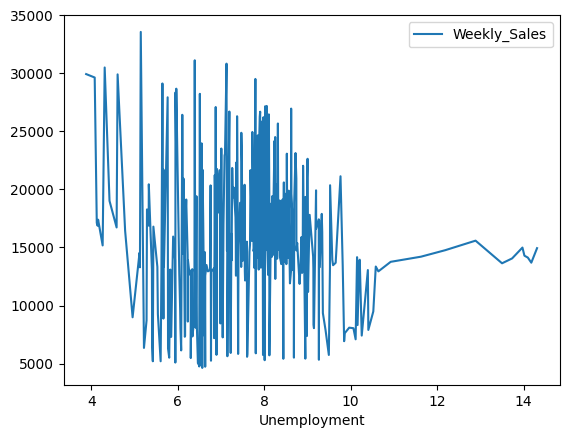

In [ ]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Thanksgiving,Christmas,week,month,year,Super_Bowl,Labor_Day
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,False,A,151315,False,False,5,2,2010,False,False
1,1,2,2010-02-05,50605.27,42.31,2.572,211.096358,8.106,False,A,151315,False,False,5,2,2010,False,False
2,1,3,2010-02-05,13740.12,42.31,2.572,211.096358,8.106,False,A,151315,False,False,5,2,2010,False,False
3,1,4,2010-02-05,39954.04,42.31,2.572,211.096358,8.106,False,A,151315,False,False,5,2,2010,False,False
4,1,5,2010-02-05,32229.38,42.31,2.572,211.096358,8.106,False,A,151315,False,False,5,2,2010,False,False


In [ ]:
sales_mean=sales.rolling(window=12).mean().round(4)
sales_std=sales.rolling(window=12).std().round(4)
print(sales_mean,sales_std)

Date
2010-02-05             NaN
2010-02-12             NaN
2010-02-19             NaN
2010-02-26             NaN
2010-03-05             NaN
                  ...     
2012-09-28    4.614670e+07
2012-10-05    4.626892e+07
2012-10-12    4.627467e+07
2012-10-19    4.636009e+07
2012-10-26    4.619828e+07
Name: Weekly_Sales, Length: 143, dtype: float64 Date
2010-02-05             NaN
2010-02-12             NaN
2010-02-19             NaN
2010-02-26             NaN
2010-03-05             NaN
                  ...     
2012-09-28    1.630563e+06
2012-10-05    1.680966e+06
2012-10-12    1.680304e+06
2012-10-19    1.582781e+06
2012-10-26    1.556230e+06
Name: Weekly_Sales, Length: 143, dtype: float64


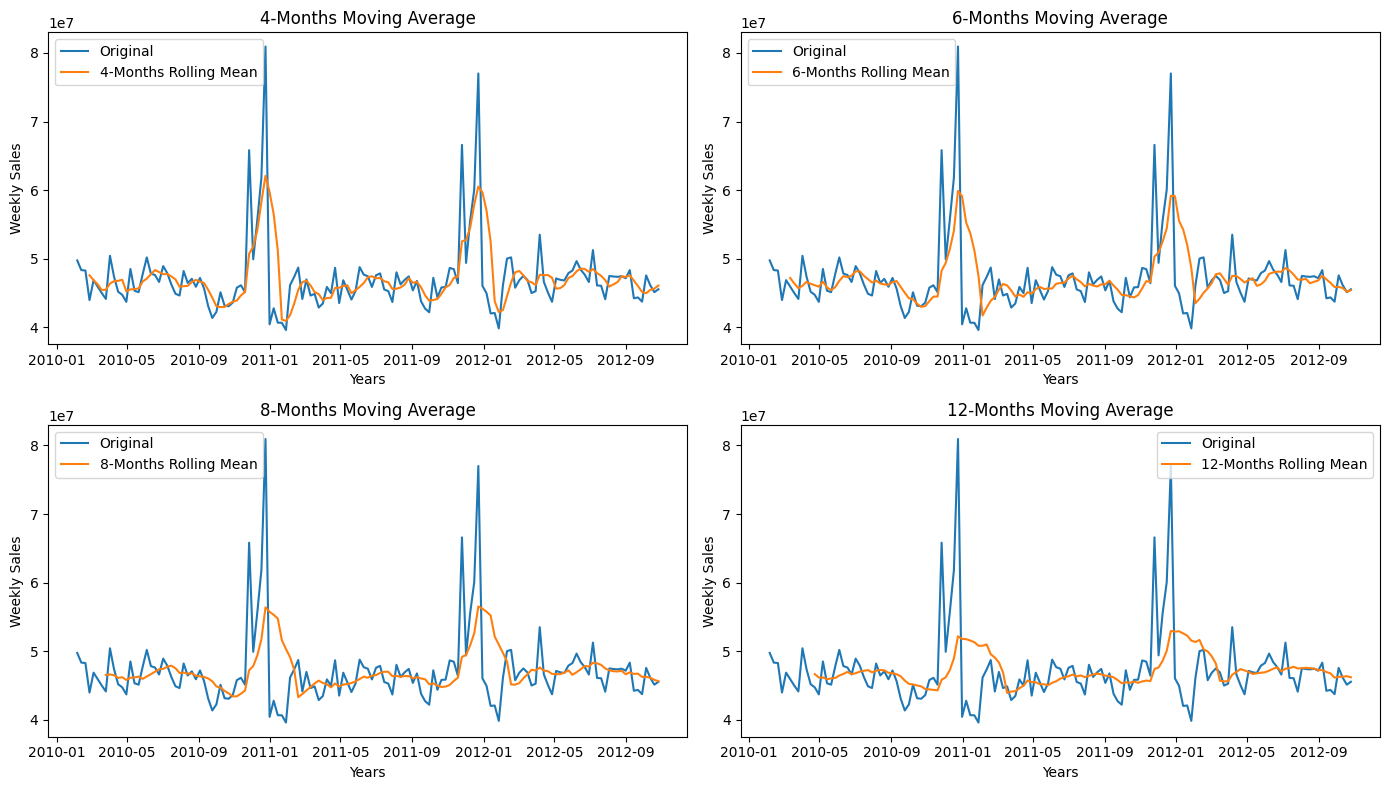

In [ ]:
fig, axes = plt.subplots(2, 2)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales.index, sales, label='Original')
axes[0][0].plot(sales.index, sales.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Weekly Sales")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(sales.index, sales, label='Original')
axes[0][1].plot(sales.index, sales.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Weekly Sales")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(sales.index, sales, label='Original')
axes[1][0].plot(sales.index, sales.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Weekly Sales")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(sales.index, sales, label='Original')
axes[1][1].plot(sales.index, sales.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Weekly Sales")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
df_m = df.copy()

In [ ]:
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
df_m['Type'] = df_m['Type'].replace(type_group)

In [ ]:
df_m['Super_Bowl'] = df_m['Super_Bowl'].astype(bool).astype(int)

In [ ]:
df_m['Thanksgiving'] = df_m['Thanksgiving'].astype(bool).astype(int)

In [ ]:
df_m['Labor_Day'] = df_m['Labor_Day'].astype(bool).astype(int)

In [ ]:
df_m['Christmas'] = df_m['Christmas'].astype(bool).astype(int)

In [ ]:
df_m['IsHoliday'] = df_m['IsHoliday'].astype(bool).astype(int)

In [ ]:
df_new = df_m.copy()

In [ ]:
drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
df_new.drop(drop_col, axis=1, inplace=True)

<ipython-input-123-b7185115a1e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr().abs(),annot=True)


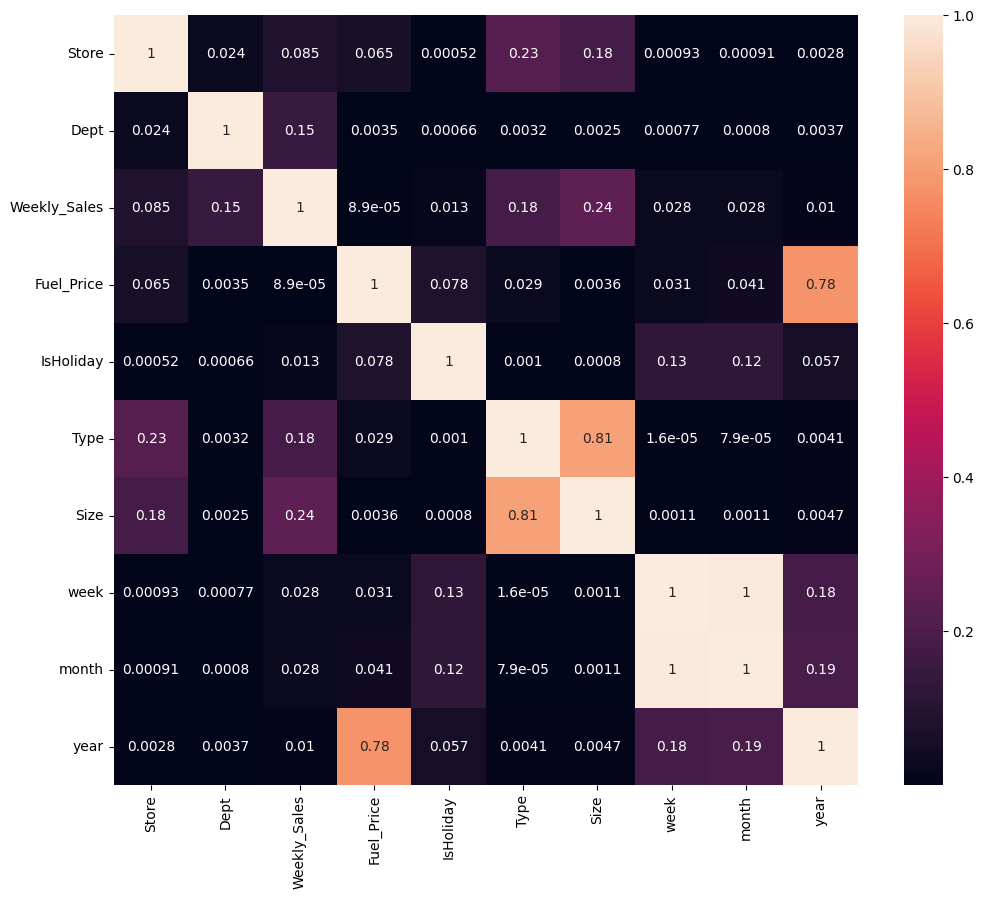

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs(),annot=True)
plt.show()

In [ ]:
drop_col = ['Temperature','CPI','Unemployment']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns

<ipython-input-122-5f738d2b5cb9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr().abs(), annot=True)    # To see the correlations without dropping columns


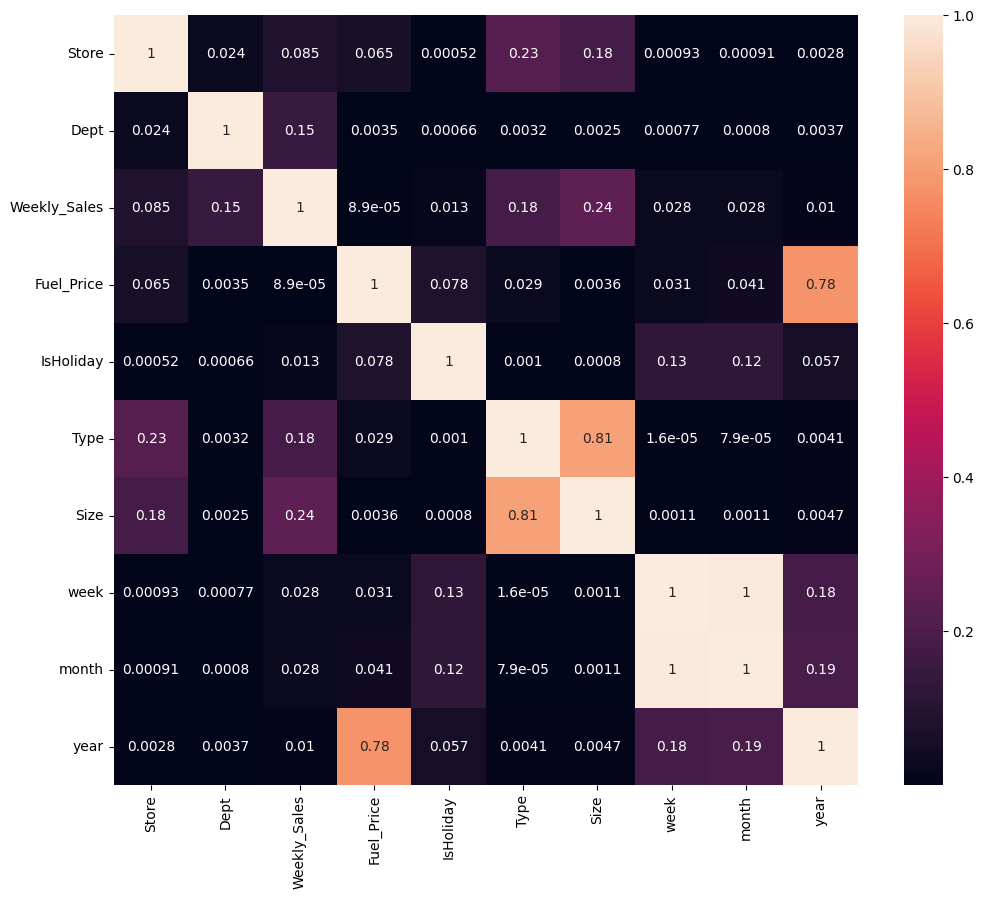

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs(), annot=True)    # To see the correlations without dropping columns
plt.show()

In [ ]:
df_new = df_new.sort_values(by='Date', ascending=True)

In [ ]:
df.head() # to see my data


,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Thanksgiving,Christmas,week,month,year,Super_Bowl,Labor_Day
0,1,1,2010-02-05,24924.50,42.31,2.572,211.096358,8.106,False,A,151315,False,False,5,2,2010,False,False
1,1,2,2010-02-05,50605.27,42.31,2.572,211.096358,8.106,False,A,151315,False,False,5,2,2010,False,False
2,1,3,2010-02-05,13740.12,42.31,2.572,211.096358,8.106,False,A,151315,False,False,5,2,2010,False,False
3,1,4,2010-02-05,39954.04,42.31,2.572,211.096358,8.106,False,A,151315,False,False,5,2,2010,False,False
4,1,5,2010-02-05,32229.38,42.31,2.572,211.096358,8.106,False,A,151315,False,False,5,2,2010,False,False


In [ ]:
df.set_index('Date', inplace=True)

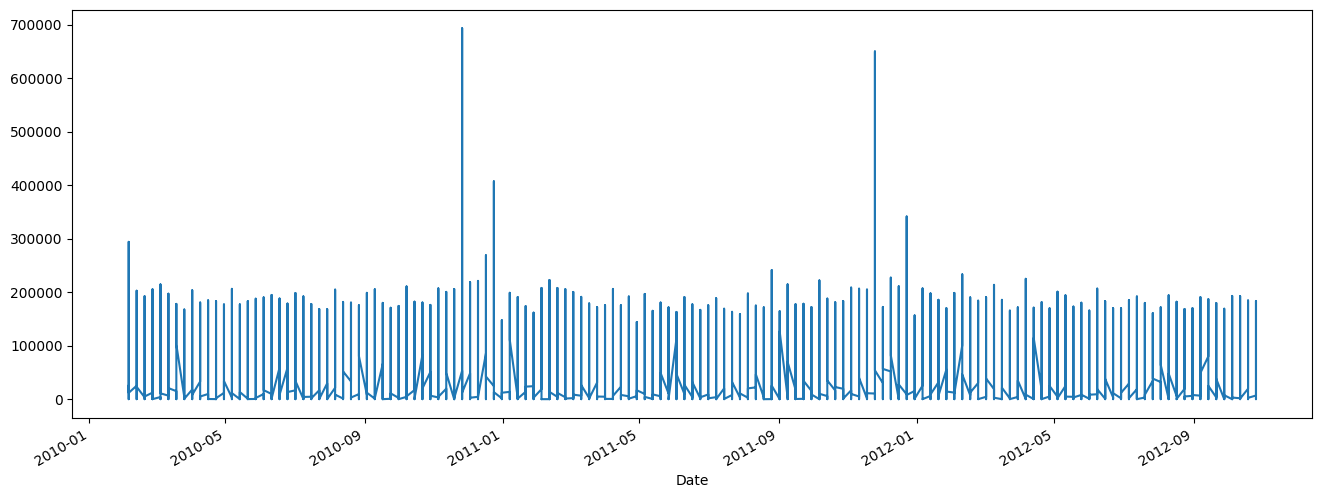

In [ ]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

In [ ]:
df_week = df.resample('W').mean(numeric_only=True)


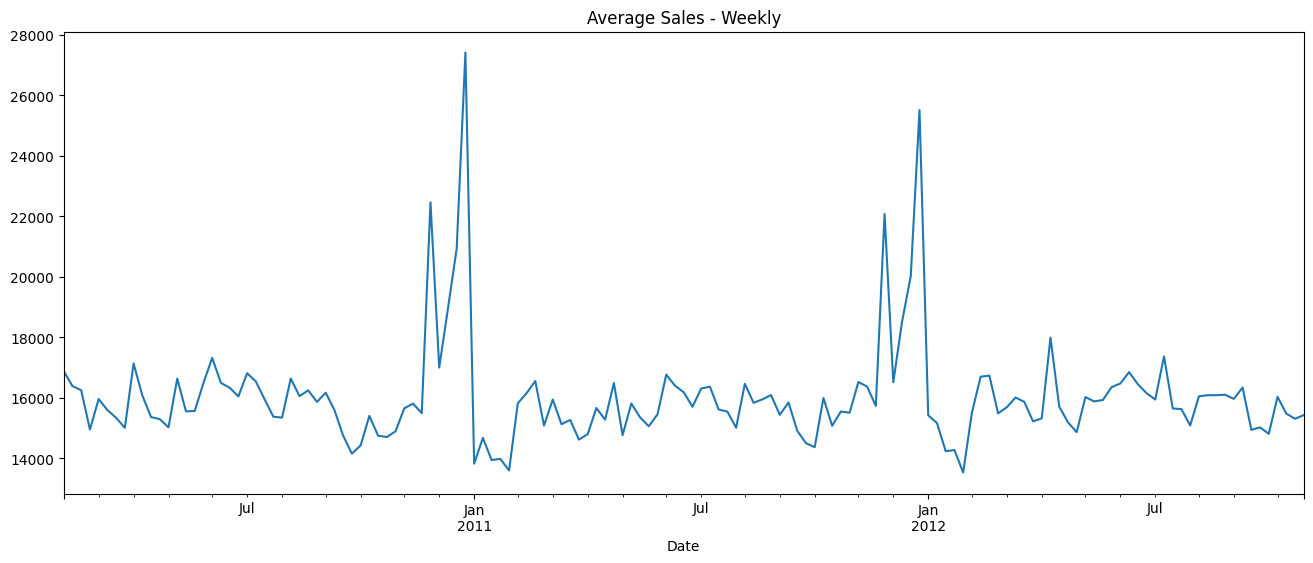

In [ ]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

In [ ]:
df_month = df.resample('MS').mean(numeric_only=True)

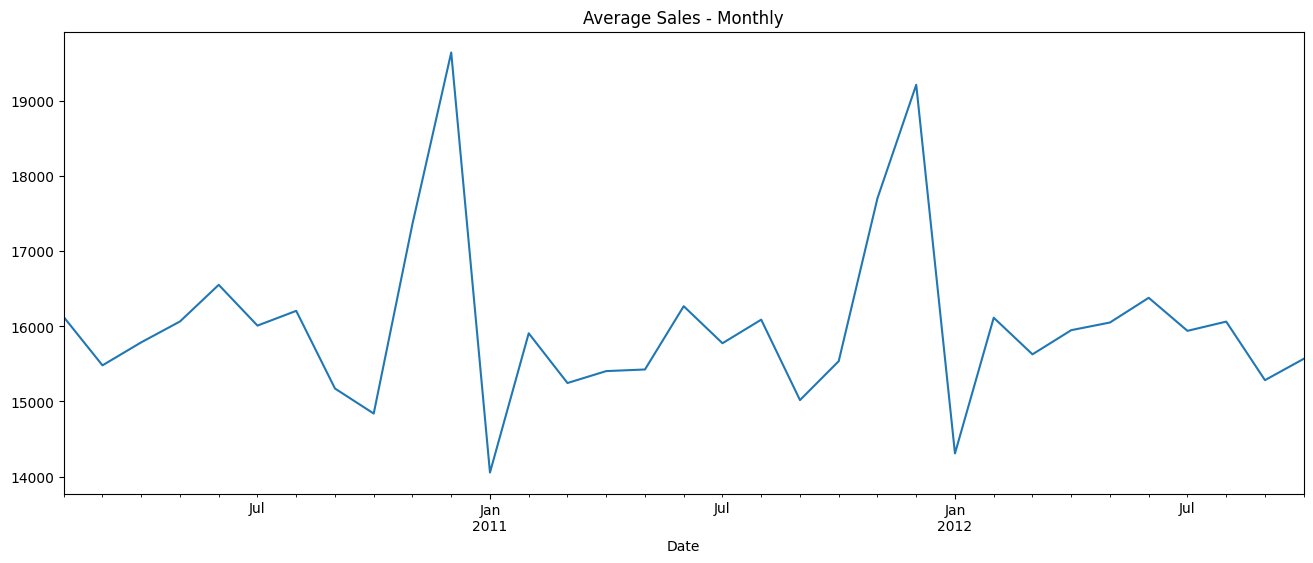

In [ ]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

In [ ]:

roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

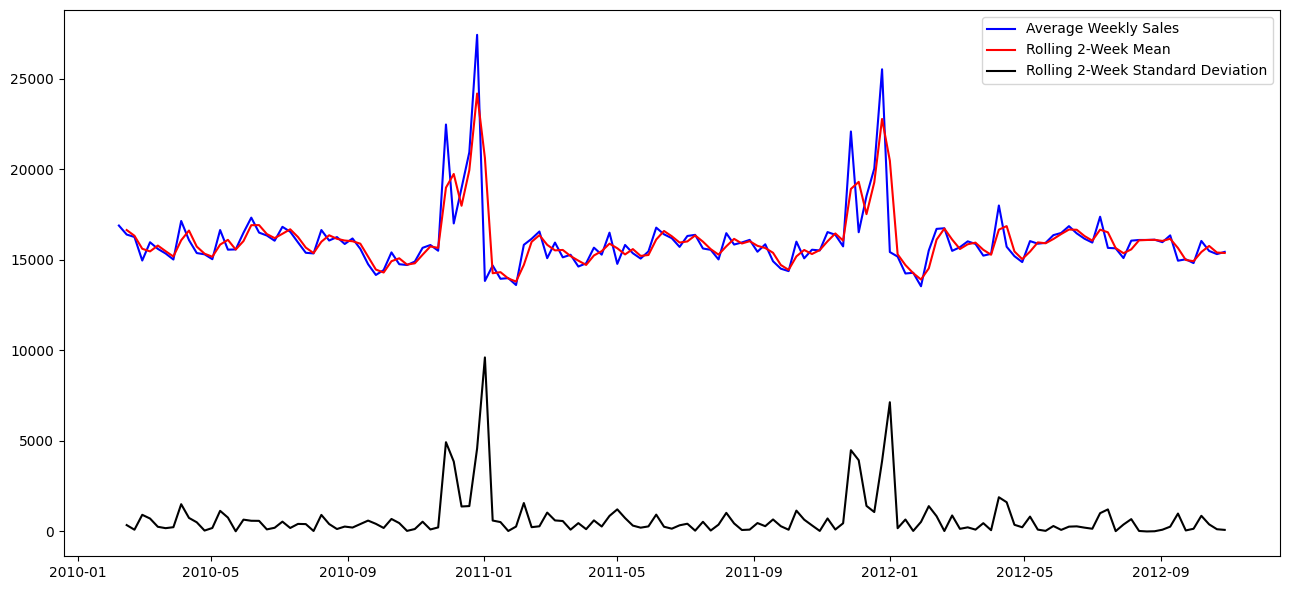

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adfuller(df_week['Weekly_Sales'])


(-5.927107223737572,
 2.4290492082042356e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 2261.596421168073)

In [ ]:
train_data = df_week[:int(0.7*(len(df_week)))]
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 12)
Test: (43, 12)


In [ ]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except price

# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

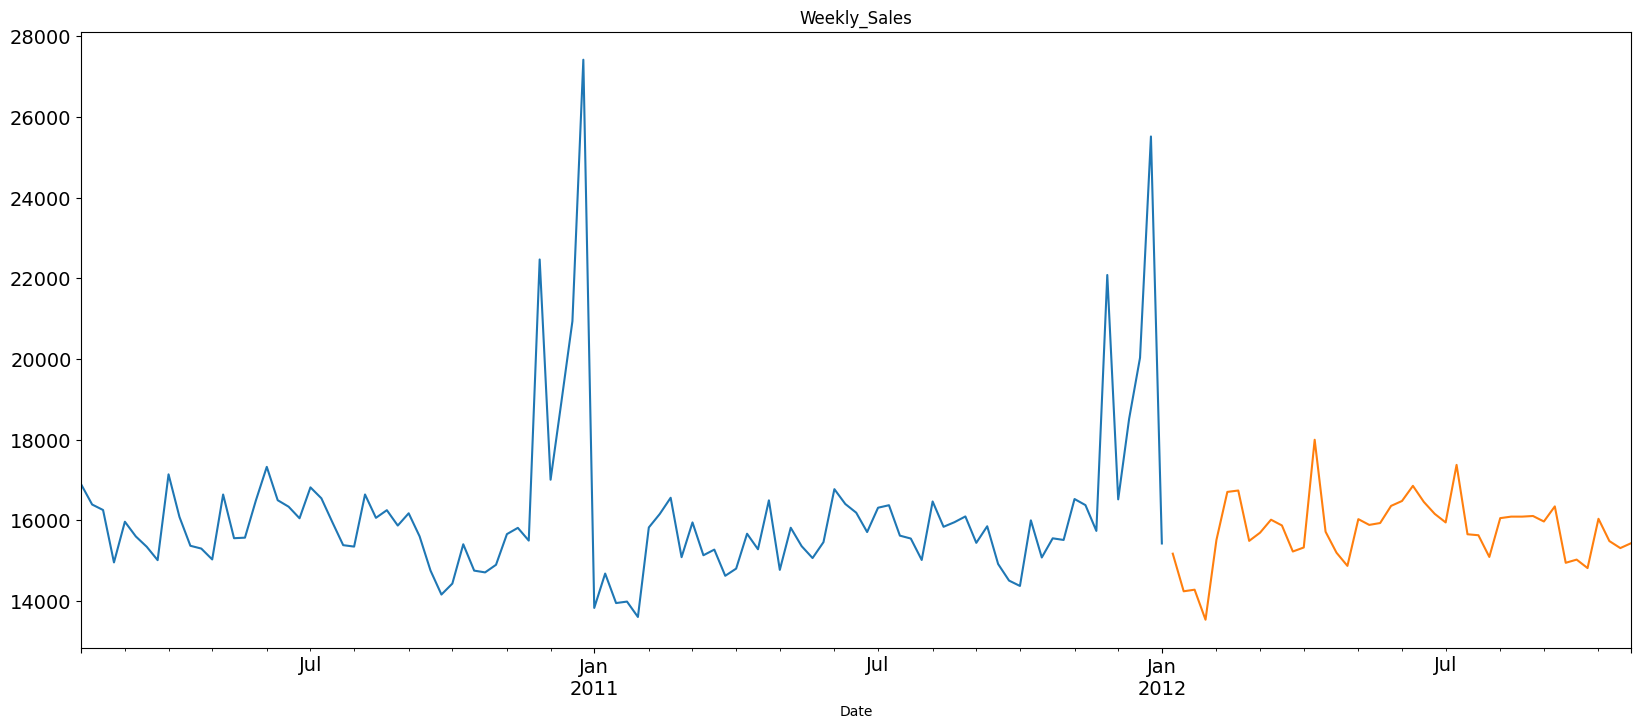

In [ ]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df_week['Weekly_Sales'].values, 'additive', period=20) #decomposing of weekly data


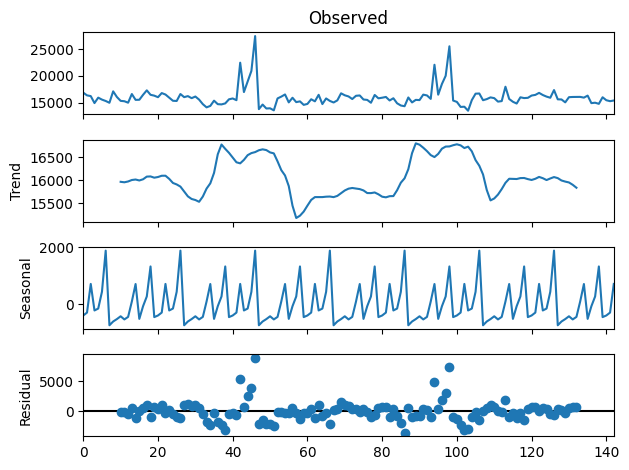

In [ ]:
decomposed.plot()
plt.show()

In [ ]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values


In [ ]:
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()


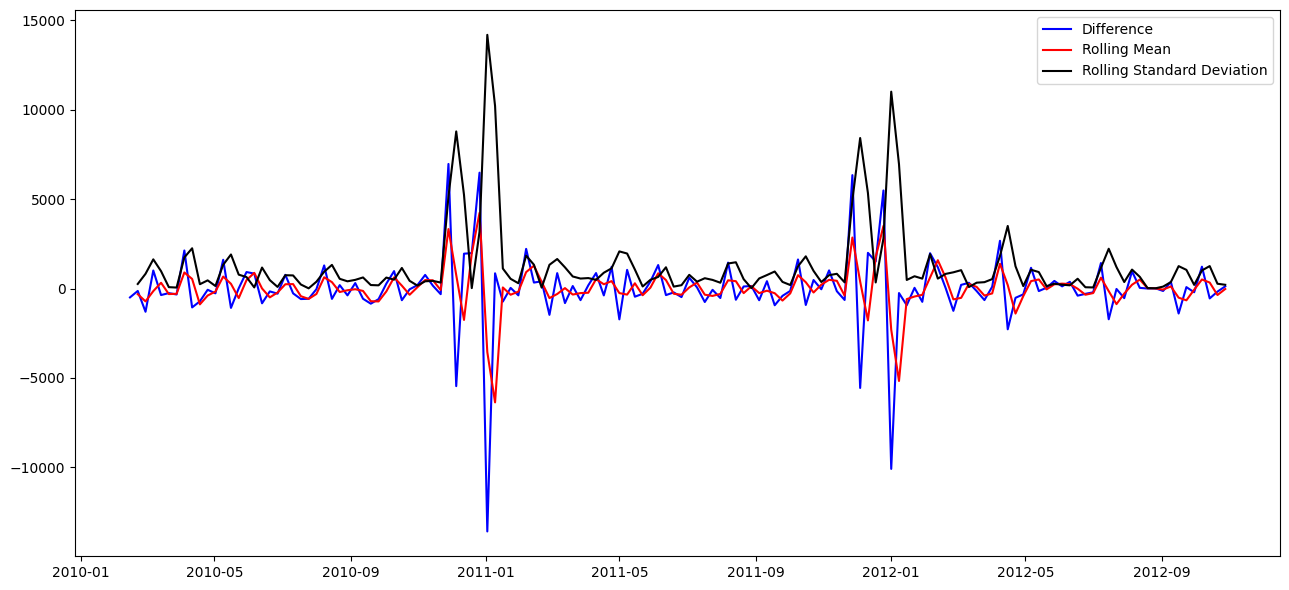

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [ ]:
df_week_lag = df_week['Weekly_Sales'].shift().dropna()


In [ ]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean()
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()


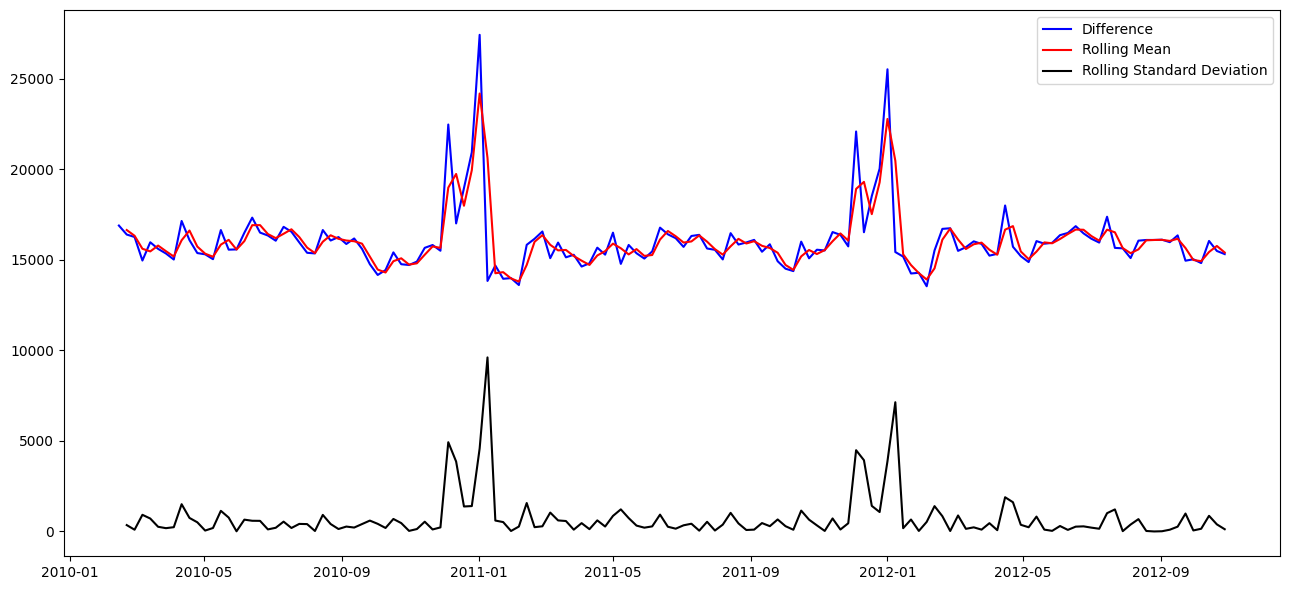

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [ ]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna()


In [ ]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

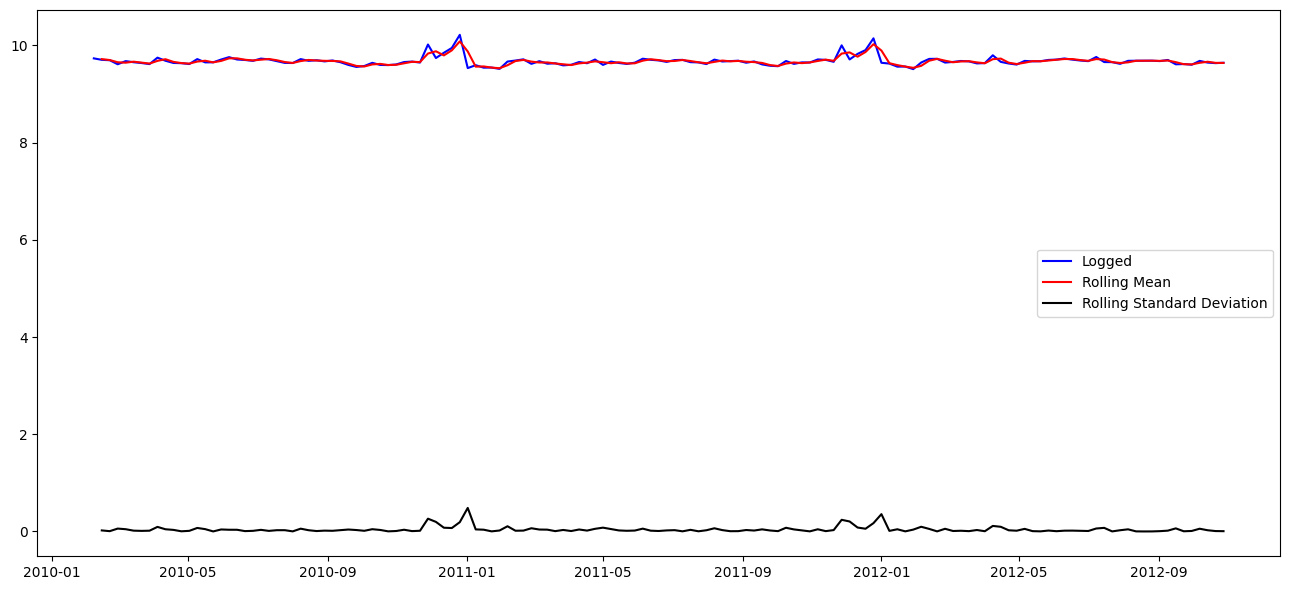

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [ ]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.8 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1826.858, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.619, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.532, Time=0.32 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.051, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.966, Time=0.50 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=1.94 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=2.88 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.215, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=2.21 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1791.045, Tim

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

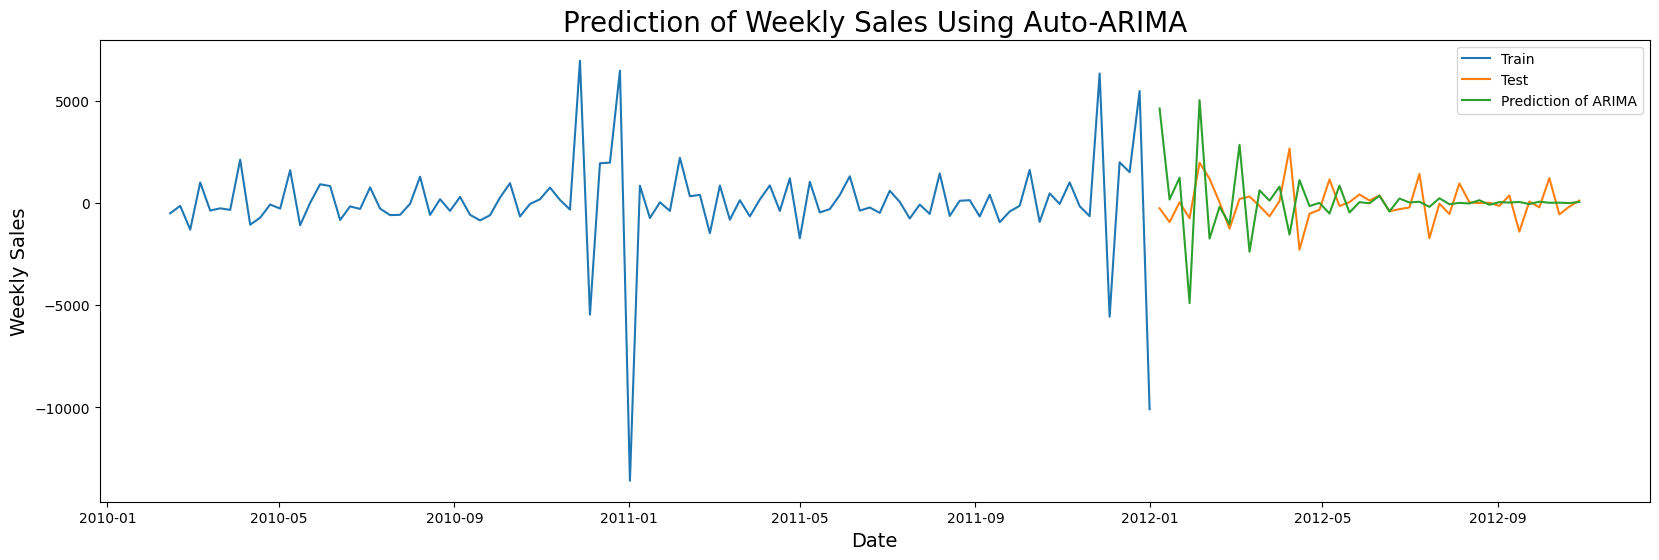

In [ ]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

<ipython-input-164-42c55e475b39>:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


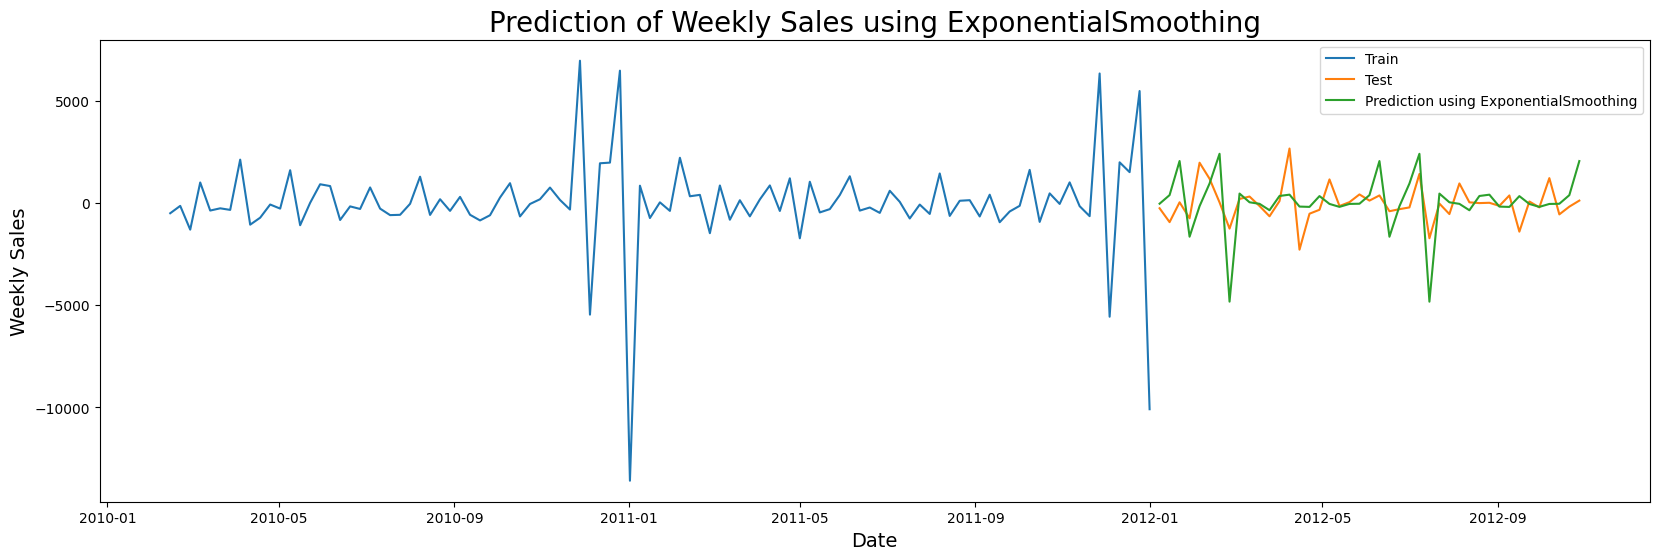

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))# Predict the test data
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [ ]:
pip install arch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 11.0 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

am = arch_model(train_data_diff, vol='GARCH',power=1,o=1)
res = am.fit(update_freq=5)
print(res.summary())

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.808e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      5,   Func. Count:     34,   Neg. LLF: 889.1557607946379
Iteration:     10,   Func. Count:     66,   Neg. LLF: 874.1897369270949
Iteration:     15,   Func. Count:     96,   Neg. LLF: 870.8414920454793
Iteration:     20,   Func. Count:    126,   Neg. LLF: 870.689315659005
Iteration:     25,   Func. Count:    156,   Neg. LLF: 870.6890830289894
Iteration:     30,   Func. Count:    186,   Neg. LLF: 868.6826999267321
Iteration:     35,   Func. Count:    216,   Neg. LLF: 868.6500277181112
Iteration:     40,   Func. Count:    246,   Neg. LLF: 868.6407974536786
Optimization terminated successfully    (Exit mode 0)
            Current function value: 868.640796071047
            Iterations: 42
            Function evaluations: 269
            Gradient evaluations: 42
                  Constant Mean - TARCH/ZARCH Model Results                   
Dep. Variable:           Weekly_Sales   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:   

In [ ]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(sales, extrapolate_trend=8)


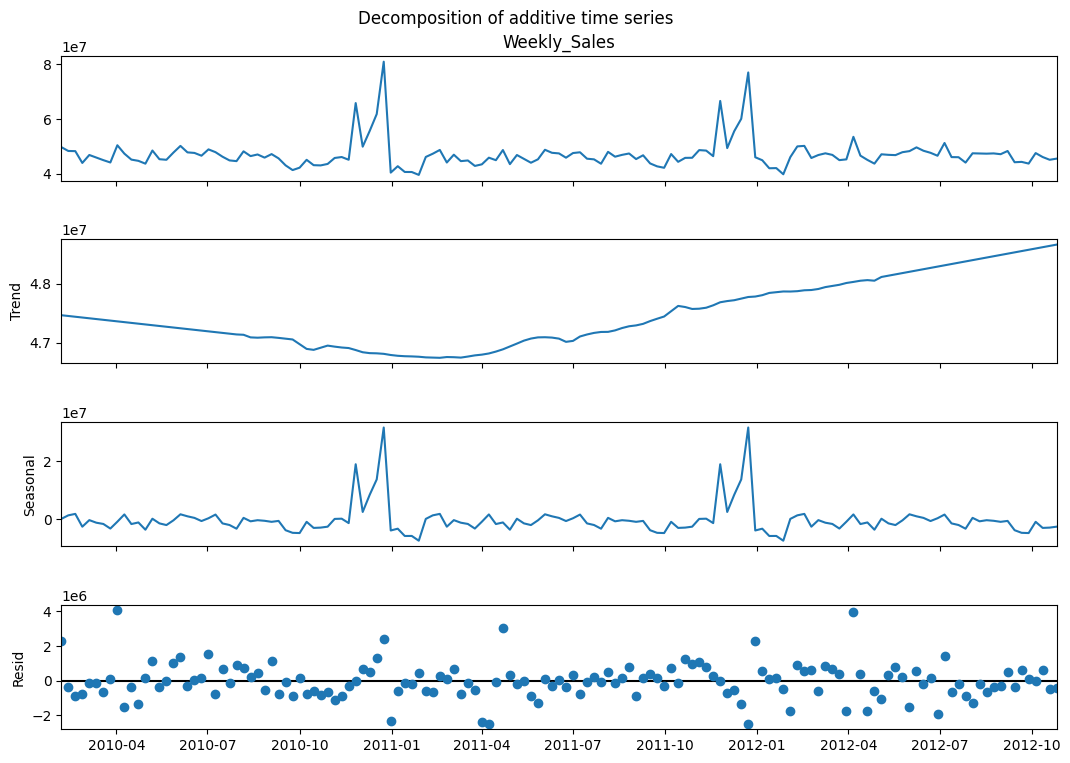

In [ ]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of additive time series')
plt.show()

In [ ]:
decomp_output = pd.DataFrame(pd.concat([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid], axis=1))


In [ ]:
decomp_output.columns = ['observed', 'Trend', 'Seasonal', 'Irregular']


In [ ]:
decomp_output['TSI'] = decomp_output.Trend*decomp_output.Seasonal*decomp_output.Irregular


In [ ]:
decomp_output

,observed,Trend,Seasonal,Irregular,TSI
Date,,,,,
2010-02-05,49750875.98,4.746335e+07,-1.680494e+02,2.287695e+06,-1.824709e+16
2010-02-12,48336800.10,4.745029e+07,1.234651e+06,-3.481425e+05,-2.039577e+19
2010-02-19,48277902.33,4.743724e+07,1.737587e+06,-8.969197e+05,-7.392979e+19
2010-02-26,43970440.65,4.742418e+07,-2.704963e+06,-7.487747e+05,9.605331e+19
2010-03-05,46872715.16,4.741112e+07,-4.232382e+05,-1.151684e+05,2.310991e+18
...,...,...,...,...,...
2012-09-28,43735713.56,4.857394e+07,-4.909747e+06,7.151975e+04,-1.705644e+19
2012-10-05,47567053.49,4.859591e+07,-1.015556e+06,-1.330446e+04,6.566000e+17
2012-10-12,46128909.98,4.861789e+07,-3.124354e+06,6.353770e+05,-9.651344e+19


In [ ]:
from statsmodels.tsa.stattools import adfuller
adfuller(sales)

(-5.908397717797433,
 2.674606788825844e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 4314.455596795056)

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -5.908398e+00
p-value                        2.674607e-07
#lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


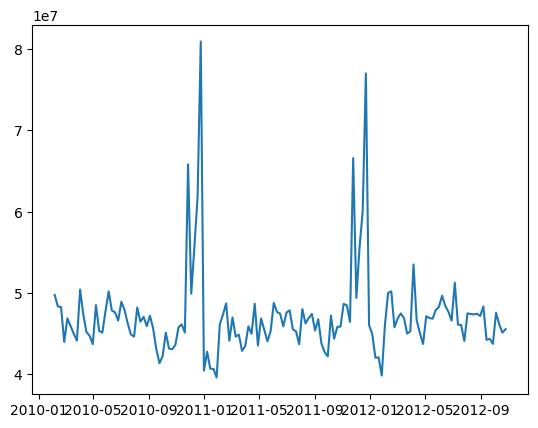

In [ ]:
plt.plot(sales)


In [ ]:
sales_log = np.log10(sales)


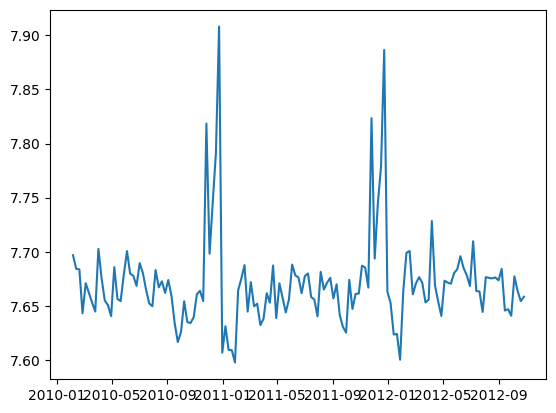

In [ ]:
plt.plot(sales_log)


In [ ]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.332944e+00
p-value                        2.876466e-08
#lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [ ]:
sales.diff(1).head()


Date
2010-02-05           NaN
2010-02-12   -1414075.88
2010-02-19     -58897.77
2010-02-26   -4307461.68
2010-03-05    2902274.51
Name: Weekly_Sales, dtype: float64

In [ ]:
sales_diff1 = sales.diff(1)
sales_diff1.dropna(inplace=True)

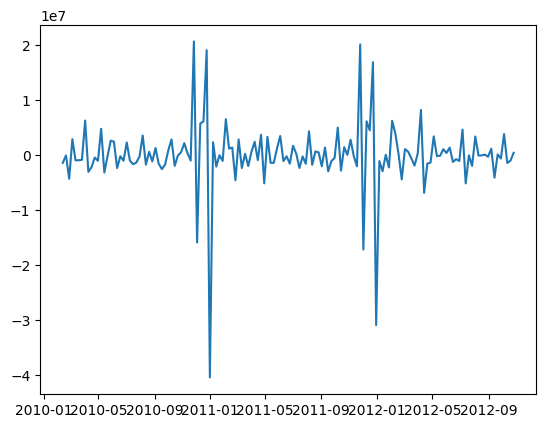

In [ ]:
plt.plot(sales_diff1)


In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                -6.699528e+00
p-value                        3.921309e-09
#lags Used                     7.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


In [ ]:
sales_log_diff1 = sales_log.diff(1)
sales_log_diff1.dropna(inplace=True)

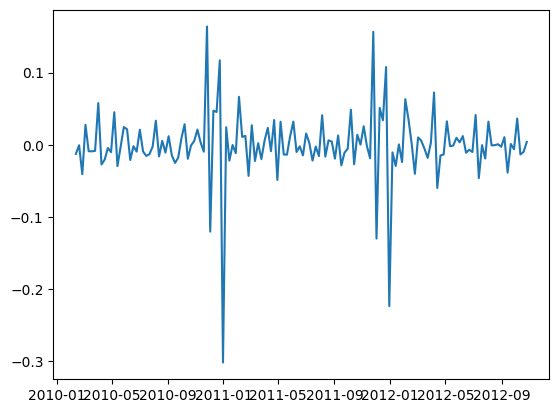

In [ ]:
plt.plot(sales_log_diff1)


In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_log_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -6.747140e+00
p-value                        3.014983e-09
#lags Used                     7.000000e+00
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


In [ ]:
sales_log_diff2 = sales_log.diff(2)
sales_log_diff2.dropna(inplace=True)

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_log_diff2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.558446e+00
p-value                        3.055019e-11
#lags Used                     4.000000e+00
Number of Observations Used    1.360000e+02
Critical Value (1%)           -3.479372e+00
Critical Value (5%)           -2.883037e+00
Critical Value (10%)          -2.578234e+00
dtype: float64


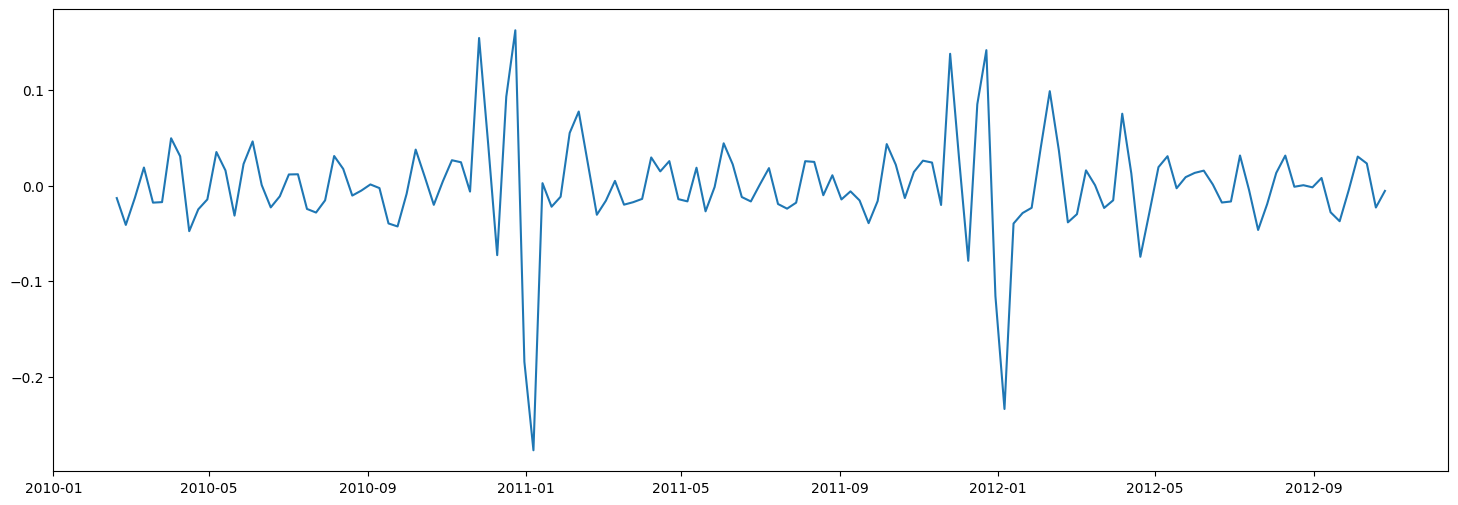

In [ ]:
plt.figure(figsize=(18, 6))
plt.plot(sales_log_diff2)

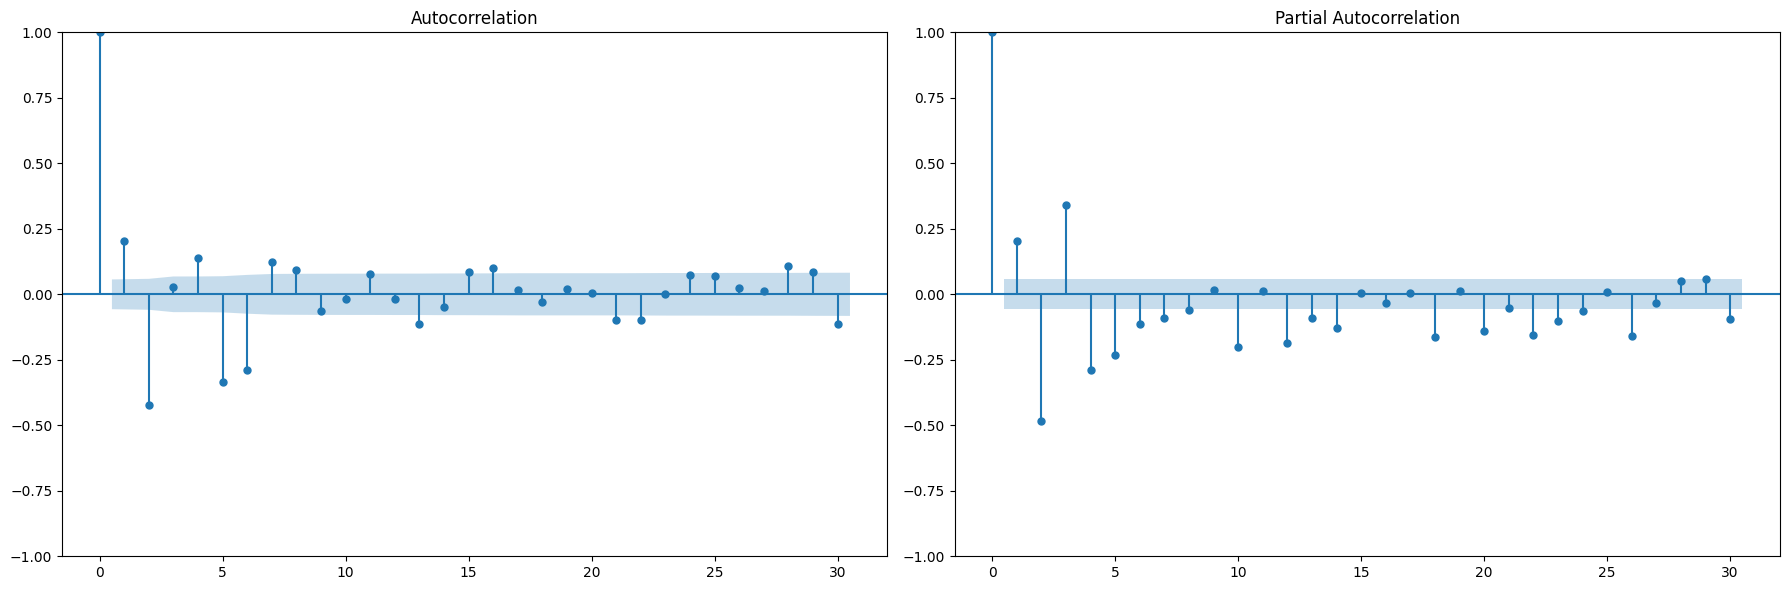

In [ ]:
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(18)
fig.set_figheight(6)
smt.graphics.plot_acf(sales_log_diff2, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_log_diff2, lags=30, ax=axes[1], alpha=0.5,method='ols')
plt.tight_layout()

In [ ]:
model = sm.tsa.statespace.SARIMAX(sales_log_diff2, order = (1,0,1), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [ ]:
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        Weekly_Sales   No. Observations:                  141
Model:             SARIMAX(1, 0, 1)x(1, 0, [], 12)   Log Likelihood                 212.409
Date:                             Sun, 03 Sep 2023   AIC                           -416.818
Time:                                     20:26:29   BIC                           -405.410
Sample:                                 02-19-2010   HQIC                          -412.183
                                      - 10-26-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3654      0.063     -5.824      0.000      -0.488      -0.242
ma.L1          1.0000   196

In [ ]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 2)
d = range(0,2)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [ ]:
pdq


[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [ ]:
D = range(0,2)
P = Q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [ ]:
import sys
import warnings

warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:

        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 model - AIC:-492.9815537127336


In [ ]:
best_model = sm.tsa.statespace.SARIMAX(sales_log,
                                      order=(1, 1, 1),
                                      seasonal_order=(0, 0, 0, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

In [ ]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 249.491
Date:                Sun, 03 Sep 2023   AIC                           -492.982
Time:                        20:28:31   BIC                           -484.157
Sample:                    02-05-2010   HQIC                          -489.395
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3754      0.048      7.743      0.000       0.280       0.470
ma.L1         -1.0000     54.086     -0.018      0.985    -107.007     105.007
sigma2         0.0016      0.087      0.018      0.9

In [ ]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-09-14'), full_results=True)


In [ ]:
pred_dynamic.predicted_mean


2012-09-14    7.676194
2012-09-21    7.661504
2012-09-28    7.661869
2012-10-05    7.659425
2012-10-12    7.673244
2012-10-19    7.668173
2012-10-26    7.664478
Freq: W-FRI, Name: predicted_mean, dtype: float64

In [ ]:
forecast=np.power(10, pred_dynamic.predicted_mean)


In [ ]:
actual = sales['2012-09-14':]
actual

Date
2012-09-14    44226897.92
2012-09-21    44354937.08
2012-09-28    43735713.56
2012-10-05    47567053.49
2012-10-12    46128909.98
2012-10-19    45122443.96
2012-10-26    45544379.53
Name: Weekly_Sales, dtype: float64

In [ ]:
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)


In [ ]:
print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE_last1year, 4)))


The Mean Absolute percentage error of our forecast for last two years is 0.0378


In [ ]:
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 3507474402594.731
The ROOT Mean Squared Error of our forecasts is 1872825.246144106


In [ ]:
np.power(10, best_results.forecast(steps=12))


2012-11-02    4.633972e+07
2012-11-09    4.664186e+07
2012-11-16    4.675580e+07
2012-11-23    4.679864e+07
2012-11-30    4.681473e+07
2012-12-07    4.682078e+07
2012-12-14    4.682304e+07
2012-12-21    4.682390e+07
2012-12-28    4.682422e+07
2013-01-04    4.682434e+07
2013-01-11    4.682438e+07
2013-01-18    4.682440e+07
Freq: W-FRI, Name: predicted_mean, dtype: float64

In [ ]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [ ]:
pred_ci_99.head()


,lower Weekly_Sales,upper Weekly_Sales
2012-11-02,7.587081,7.744826
2012-11-09,7.584335,7.753216
2012-11-16,7.584567,7.755103
2012-11-23,7.584822,7.755644
2012-11-30,7.584941,7.755824


In [ ]:
pred_ci_95.head()


,lower Weekly_Sales,upper Weekly_Sales
2012-11-02,7.587081,7.744826
2012-11-09,7.584335,7.753216
2012-11-16,7.584567,7.755103
2012-11-23,7.584822,7.755644
2012-11-30,7.584941,7.755824


In [ ]:
n_steps = 36
idx = pd.date_range(sales.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]),
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]),
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [ ]:
fc_95.head()


,forecast,lower_ci_95,upper_ci_95
2012-11-01,4.633972e+07,3.864390e+07,5.556814e+07
2012-12-01,4.664186e+07,3.840036e+07,5.665216e+07
2013-01-01,4.675580e+07,3.842090e+07,5.689884e+07
2013-02-01,4.679864e+07,3.844345e+07,5.696972e+07
2013-03-01,4.681473e+07,3.845399e+07,5.699328e+07


In [ ]:
fc_99.head()


,lower_ci_99,upper_ci_99
2012-11-01,3.864390e+07,5.556814e+07
2012-12-01,3.840036e+07,5.665216e+07
2013-01-01,3.842090e+07,5.689884e+07
2013-02-01,3.844345e+07,5.696972e+07
2013-03-01,3.845399e+07,5.699328e+07


In [ ]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2012-11-01,4.633972e+07,3.864390e+07,5.556814e+07,3.864390e+07,5.556814e+07
2012-12-01,4.664186e+07,3.840036e+07,5.665216e+07,3.840036e+07,5.665216e+07
2013-01-01,4.675580e+07,3.842090e+07,5.689884e+07,3.842090e+07,5.689884e+07
2013-02-01,4.679864e+07,3.844345e+07,5.696972e+07,3.844345e+07,5.696972e+07
2013-03-01,4.681473e+07,3.845399e+07,5.699328e+07,3.845399e+07,5.699328e+07


In [ ]:
pd.plotting.register_matplotlib_converters()


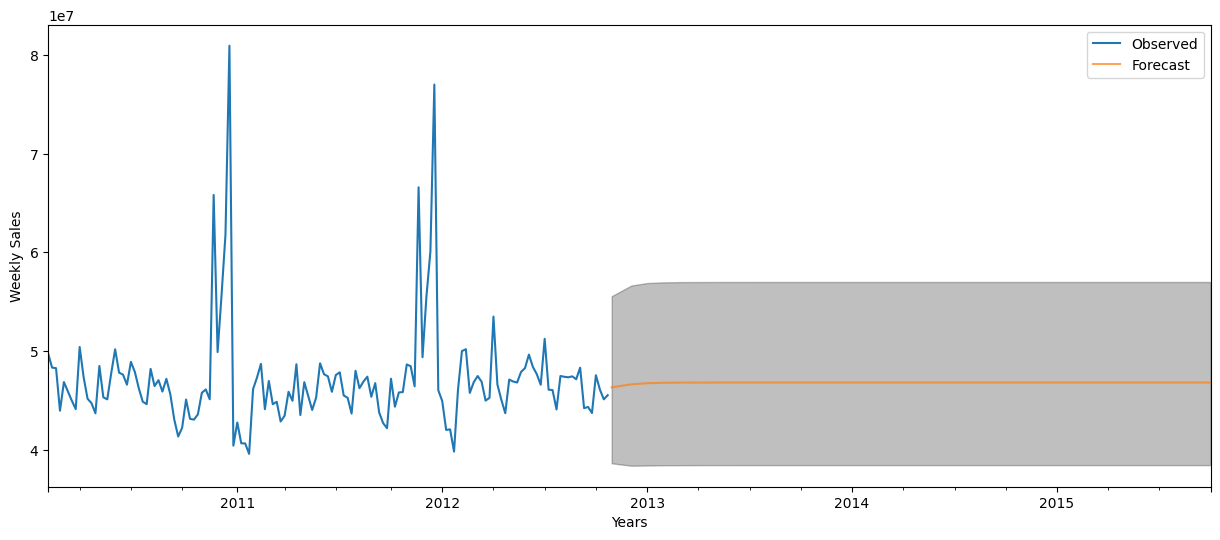

In [ ]:
axis = sales.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Weekly Sales')
plt.legend(loc='best')
plt.show()

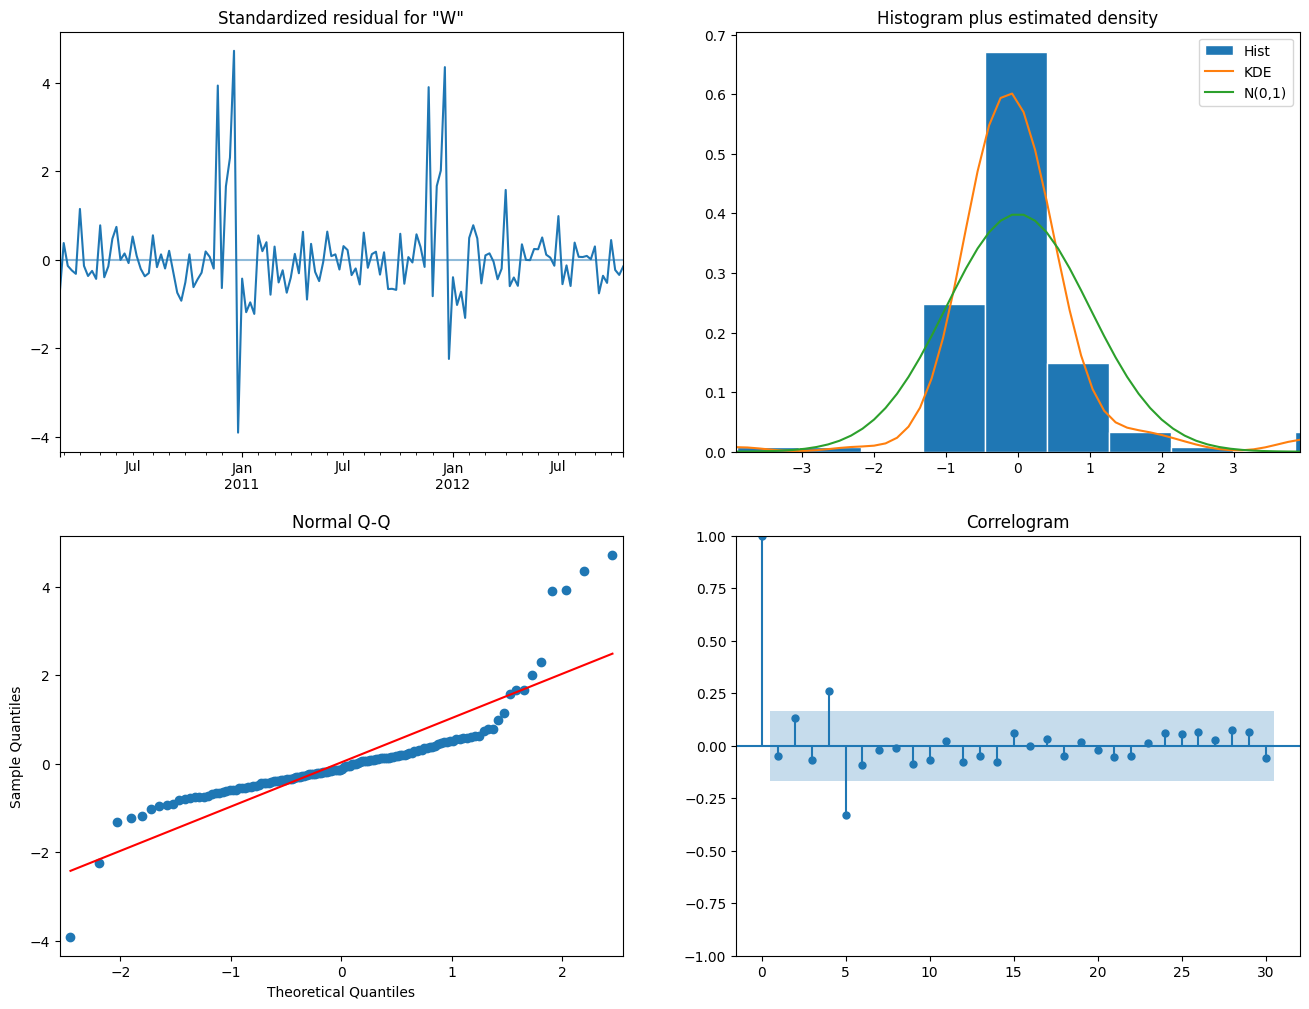

In [ ]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


alpha = 0.4
beta = 0.2
gamma = 0.01

ets_model = ExponentialSmoothing(sales, trend='add', seasonal='add', seasonal_periods=12)
ets_fit = ets_model.fit(optimized=True)

In [ ]:
p_ahead = 36
yh = ets_fit.forecast(p_ahead)

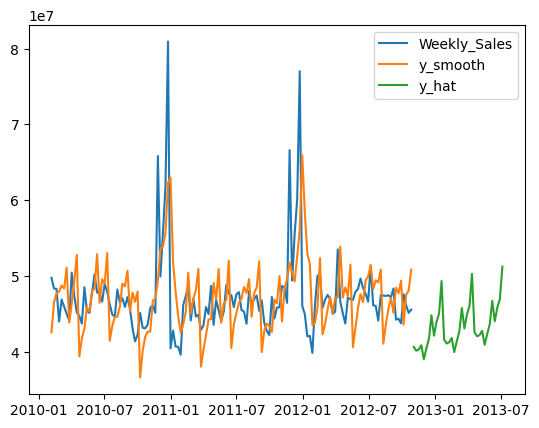

In [ ]:
plt.plot(sales, label='Weekly_Sales')
plt.plot(ets_fit.fittedvalues, label='y_smooth')
plt.plot(yh, label='y_hat')

plt.legend()
plt.show()